## Ejercicio 1: Análisis de datos epidemiológicos

Cargamos los datos

In [2]:
import requests
import seaborn as sns
csv = requests.get("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv")

In [3]:
with open('df.csv','wb') as f:
  f.write(csv.content)

In [4]:
import pandas as pd
df = pd.read_csv("df.csv")

In [5]:
df.head()

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN


In [9]:
print('Columnas: {}\nCantidad de registros: {}'.format(list(df.columns),len(df)))

Columnas: ['informeNumero', 'fecha', 'total_camas_hospitales', 'camas_ocupadas_hospitales', 'porcentaje_ocupacion_camas_hospitales', 'camas_covid', 'camas_sospechosos_covid', 'camas_confirmados_covid', 'porcentaje_ocupacion_camas_covid', 'uti_covid_totales', 'uti_covid_ocupadas', 'respiradores_totales', 'respiradores_ocupados', 'respiradores_covid_totales', 'respiradores_covid_ocupados', 'total_camas_ucma', 'total_camas_ocupadas_ucma', 'sedes_ucma', 'observaciones']
Cantidad de registros: 88


Cada registro corresponde a un informe diario de indicadores.
Observamos que hay columnas relacionadas, combinando las distintas combinaciones de estas características:
- Tipo de recurso: camas, camas UTI (Unidad de Terapia Intensiva), camas UCMA (Unidad de Cuidado Minimo Ambulatorio), o respiradores. 
- Cantidad total o cantidad ocupada
- Recurso disponible para cualquier paciente o reservado para pacientes covid  

Hacemos un gráfico inicial para ver cómo varían los indicadores a lo largo del tiempo (i.e., a lo largo de los numeros de informe)

Text(0.5, 1.0, 'Camas en UCMA')

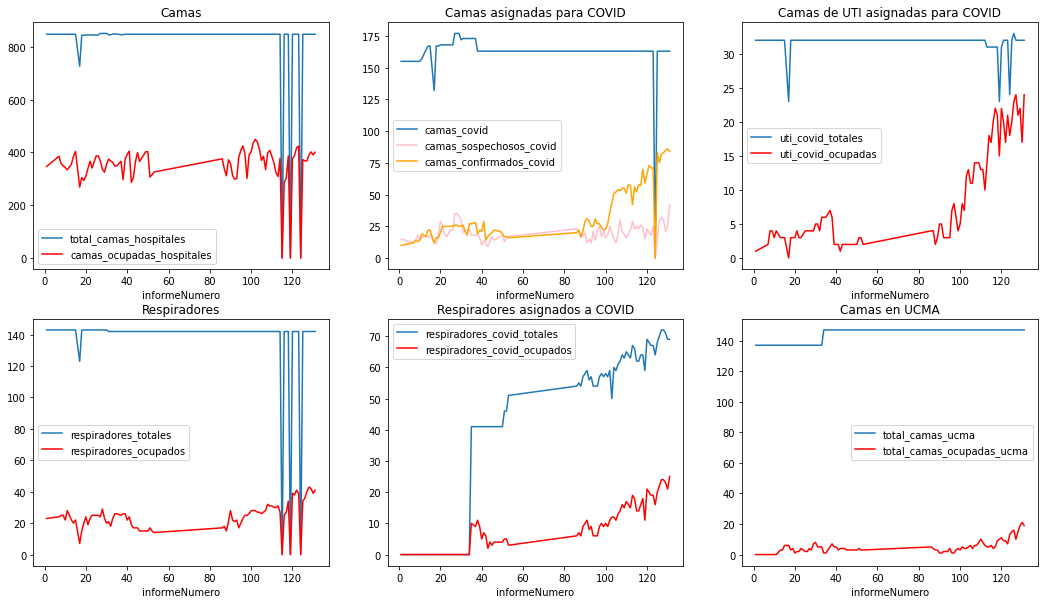

In [11]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,3,figsize=(18,10))
ax=axs[0][0]
df.plot.line(x='informeNumero', y='total_camas_hospitales',ax=ax)
df.plot.line(x='informeNumero', y='camas_ocupadas_hospitales',ax=ax,color='red')
ax.set_title('Camas')

ax=axs[0][1]
df.plot.line(x='informeNumero', y='camas_covid',ax=ax)
df.plot.line(x='informeNumero', y='camas_sospechosos_covid',ax=ax,color='pink')
df.plot.line(x='informeNumero', y='camas_confirmados_covid',ax=ax,color='orange')
ax.set_title('Camas asignadas para COVID')

ax=axs[0][2]
df.plot.line(x='informeNumero', y='uti_covid_totales',ax=ax)
df.plot.line(x='informeNumero', y='uti_covid_ocupadas',ax=ax,color='red')
ax.set_title('Camas de UTI asignadas para COVID')

ax=axs[1][0]
df.plot.line(x='informeNumero', y='respiradores_totales',ax=ax)
df.plot.line(x='informeNumero', y='respiradores_ocupados',ax=ax,color='red')
ax.set_title('Respiradores')

ax=axs[1][1]
df.plot.line(x='informeNumero', y='respiradores_covid_totales',ax=ax)
df.plot.line(x='informeNumero', y='respiradores_covid_ocupados',ax=ax,color='red')
ax.set_title('Respiradores asignados a COVID')

ax=axs[1][2]
df.plot.line(x='informeNumero', y='total_camas_ucma',ax=ax)
df.plot.line(x='informeNumero', y='total_camas_ocupadas_ucma',ax=ax,color='red')
ax.set_title('Camas en UCMA')


In [47]:
sorted(df[df.respiradores_covid_ocupados!=0].informeNumero)[0]

35

In [48]:
sorted(df[df.respiradores_covid_ocupados!=0].fecha)[0]

'2020-07-26'

Saltan a la vista algunas observaciones: 
- Hay datos erróneos o faltantes en los pozos abruptos, que habrá que depurar
- Las cantidades totales tienen comportamiento constante (ej: respiradores_totales, total_camas_hospitales, total_camas_ucma, uti_covid_totales, camas_covid)
- Respecto a la cantidad de respiradores_covid_totales, identificamos que es una medida que comenzó a registrarse más tarde que las demás (a partir del informe 35). Posiblemente cerca del 26 de julio del 2020 se implementó la medida de reservar respiradores especialmente asignados para pacientes COVID


Identificamos y eliminamos los registros con dato faltante

In [12]:
df[df.total_camas_hospitales==0].index

Int64Index([7, 12, 16], dtype='int64')

In [13]:
df = df.drop(df[df.total_camas_hospitales==0].index)

Construimos una característica que sume las camas covid de sospechosos y confirmados, para compararla en proporción al total de camas covid

In [14]:
df['camas_ocupadas_covid_total'] = df['camas_sospechosos_covid']+df['camas_confirmados_covid']

Regraficamos

Text(0.5, 1.0, 'Camas en UCMA')

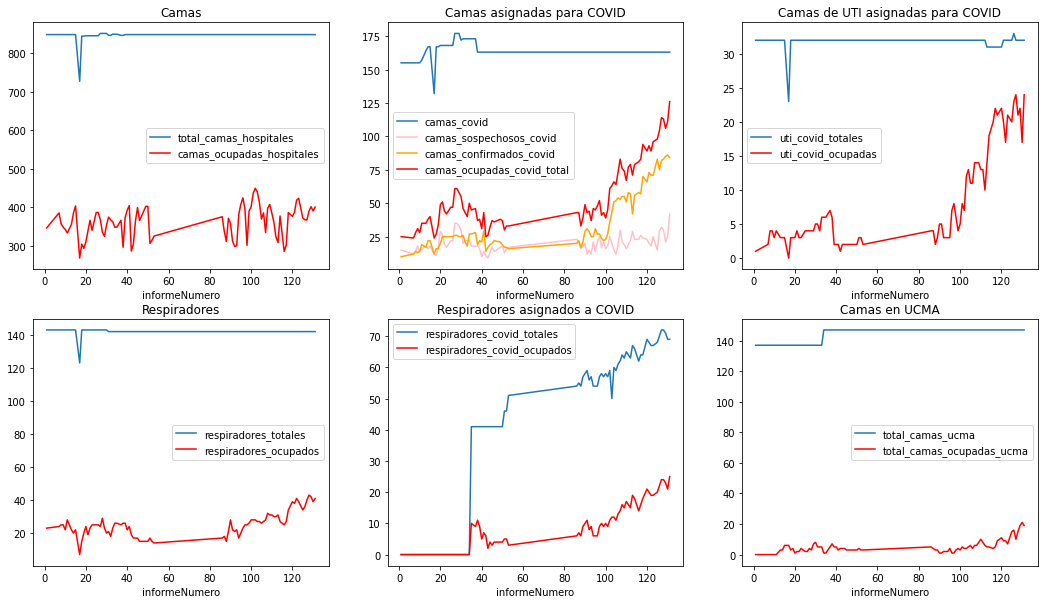

In [15]:
fig,axs = plt.subplots(2,3,figsize=(18,10))
ax=axs[0][0]
df.plot.line(x='informeNumero', y='total_camas_hospitales',ax=ax)
df.plot.line(x='informeNumero', y='camas_ocupadas_hospitales',ax=ax,color='red')
ax.set_title('Camas')

ax=axs[0][1]
df.plot.line(x='informeNumero', y='camas_covid',ax=ax)
df.plot.line(x='informeNumero', y='camas_sospechosos_covid',ax=ax,color='pink')
df.plot.line(x='informeNumero', y='camas_confirmados_covid',ax=ax,color='orange')
df.plot.line(x='informeNumero', y='camas_ocupadas_covid_total',ax=ax,color='red')
ax.set_title('Camas asignadas para COVID')

ax=axs[0][2]
df.plot.line(x='informeNumero', y='uti_covid_totales',ax=ax)
df.plot.line(x='informeNumero', y='uti_covid_ocupadas',ax=ax,color='red')
ax.set_title('Camas de UTI asignadas para COVID')

ax=axs[1][0]
df.plot.line(x='informeNumero', y='respiradores_totales',ax=ax)
df.plot.line(x='informeNumero', y='respiradores_ocupados',ax=ax,color='red')
ax.set_title('Respiradores')

ax=axs[1][1]
df.plot.line(x='informeNumero', y='respiradores_covid_totales',ax=ax)
df.plot.line(x='informeNumero', y='respiradores_covid_ocupados',ax=ax,color='red')
ax.set_title('Respiradores asignados a COVID')

ax=axs[1][2]
df.plot.line(x='informeNumero', y='total_camas_ucma',ax=ax)
df.plot.line(x='informeNumero', y='total_camas_ocupadas_ucma',ax=ax,color='red')
ax.set_title('Camas en UCMA')


In [24]:
df['camas_ocupadas_suma'] = df.camas_ocupadas_covid_total + df.total_camas_ocupadas_ucma + df.uti_covid_totales

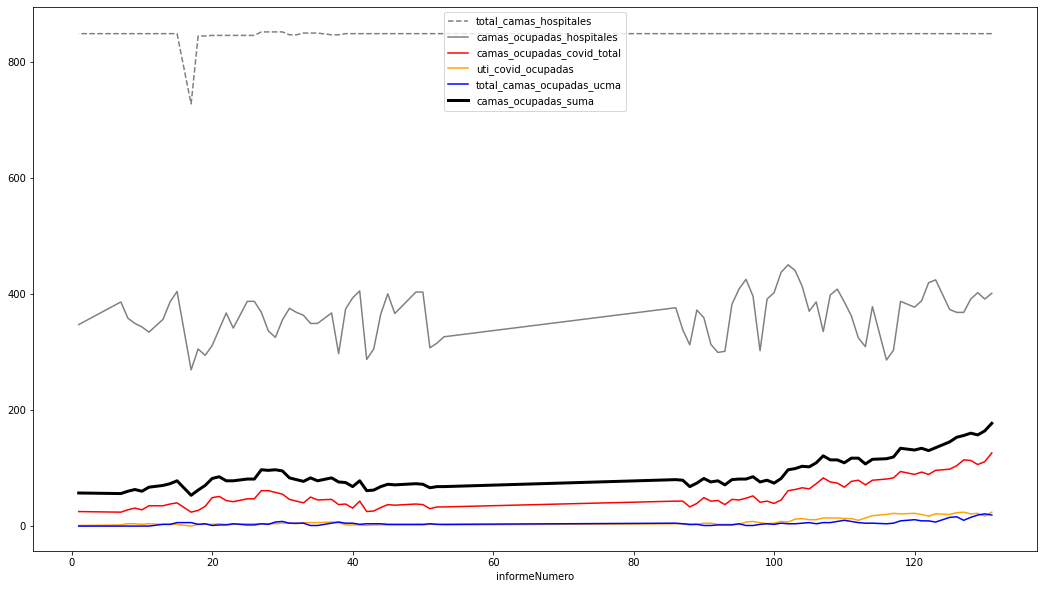

In [31]:
fig,ax = plt.subplots(1,1,figsize=(18,10))

df.plot.line(x='informeNumero', y='total_camas_hospitales',ax=ax,color='gray',ls='--')
df.plot.line(x='informeNumero', y='camas_ocupadas_hospitales',ax=ax,color='gray')

#df.plot.line(x='informeNumero', y='camas_covid',ax=ax,ls='--',color='red')
#df.plot.line(x='informeNumero', y='camas_sospechosos_covid',ax=ax,color='pink')
#df.plot.line(x='informeNumero', y='camas_confirmados_covid',ax=ax,color='orange')
df.plot.line(x='informeNumero', y='camas_ocupadas_covid_total',ax=ax,color='red')

#df.plot.line(x='informeNumero', y='uti_covid_totales',ax=ax,ls='--',color='orange')
df.plot.line(x='informeNumero', y='uti_covid_ocupadas',ax=ax,color='orange')

#df.plot.line(x='informeNumero', y='respiradores_totales',ax=ax,color='blue',ls='--')
#df.plot.line(x='informeNumero', y='respiradores_ocupados',ax=ax,color='blue')

#df.plot.line(x='informeNumero', y='respiradores_covid_totales',ax=ax)
#df.plot.line(x='informeNumero', y='respiradores_covid_ocupados',ax=ax,color='red')

#df.plot.line(x='informeNumero', y='total_camas_ucma',ax=ax,color='blue',ls='--')
df.plot.line(x='informeNumero', y='total_camas_ocupadas_ucma',ax=ax,color='blue')
df.plot.line(x='informeNumero', y='camas_ocupadas_suma',ax=ax,color='black',lw=3)


Vemos que sumando todas las camas ocupadas en distintos ámbitos igualmente no se alcanza la cantidad camas_ocupadas_hospitales (incluso al asumir que camas_sospechosos_covid y camas_confirmados_covid no se solapan con pacientes contabilizados en uti_covid_ocupadas y total_camas_ocupadas_ucma)

Inferimos que hay datos que no figuran en este registro (ej: camas UTI ocupadas por paciente NO covid). Se plantea la duda de si la cantidad total_camas_ocupadas_ucma se refiere unicamente a pacientes Covid, ya que la tasa de ocupación es muy baja para la cantidad total disponible, haciendo sospechar que hay camas UCMA ocupadas no incluidas en ese conteo. 

Analizamos a ver si el la suma de pacientes camas_sospechosos_covid y camas_confirmados_covid se aproxima a la suma de uti_covid_ocupadas y total_camas_ocupadas_ucma

In [33]:
df['total_covid_sectores'] =  df.total_camas_ocupadas_ucma + df.uti_covid_totales


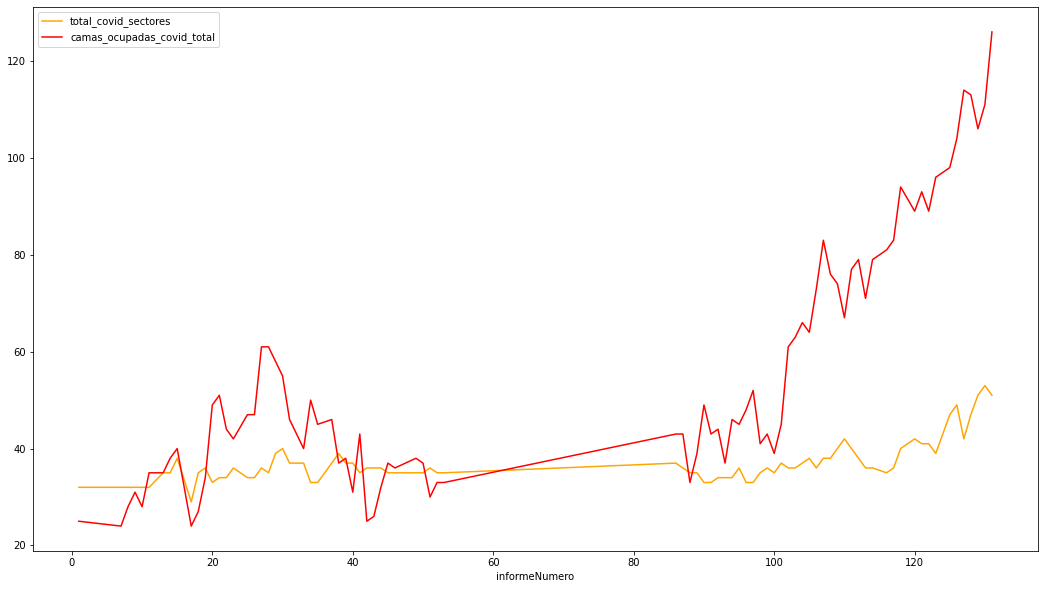

In [34]:
fig,ax = plt.subplots(1,1,figsize=(18,10))

df.plot.line(x='informeNumero', y='total_covid_sectores',ax=ax,color='orange')
df.plot.line(x='informeNumero', y='camas_ocupadas_covid_total',ax=ax,color='red')

Parece indicar que no son pacientes por completo solapados, sino que estas cuatro variables podrían estar contabilizando pacientes diferentes

#### Histogramas

Dejando de lado la variable temporal, graficamos histogramas para evaluar normalidad. Consideramos únicamente las variables que registran cambios diarios (no los totales disponibles)

Nota: el indicador de respiradores lo truncamos para considerar solo los registros donde esté dato fue medido realmente

HISTOGRAMAS DE FRECUENCIA

Text(0.5, 1.0, 'Camas en UCMA ocupadas')

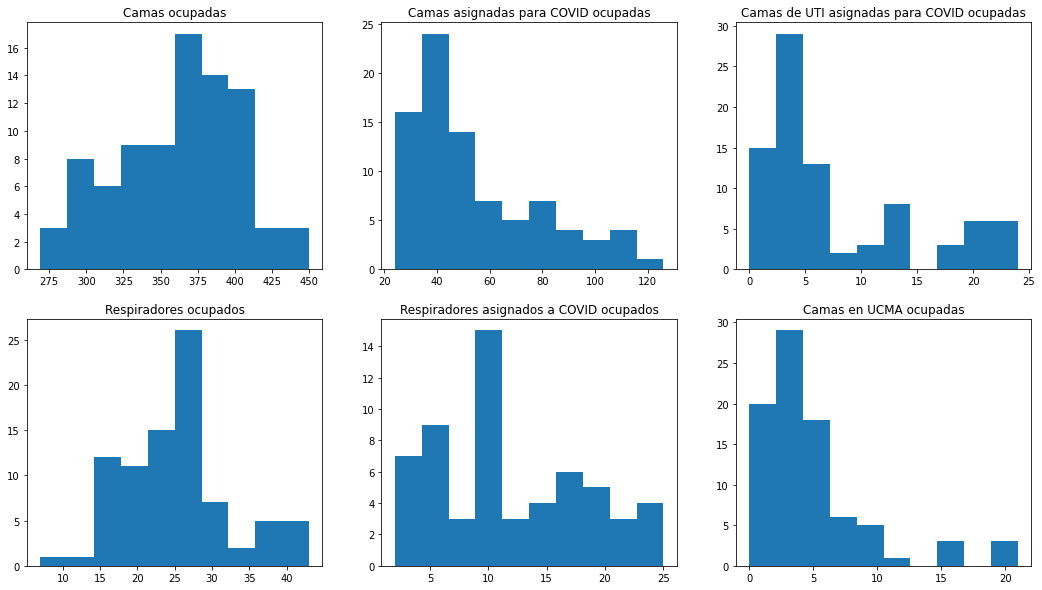

In [49]:
fig,axs = plt.subplots(2,3,figsize=(18,10))
ax=axs[0][0]
df.camas_ocupadas_hospitales.hist(ax=ax,grid=False)
ax.set_title('Camas ocupadas')

ax=axs[0][1]
df.camas_ocupadas_covid_total.hist(ax=ax,grid=False)
ax.set_title('Camas asignadas para COVID ocupadas')

ax=axs[0][2]
df.uti_covid_ocupadas.hist(ax=ax,grid=False)
ax.set_title('Camas de UTI asignadas para COVID ocupadas')

ax=axs[1][0]
df.respiradores_ocupados.hist(ax=ax,grid=False)
ax.set_title('Respiradores ocupados')

ax=axs[1][1]
df.respiradores_covid_ocupados[df.informeNumero>34].hist(ax=ax,grid=False)
ax.set_title('Respiradores asignados a COVID ocupados')

ax=axs[1][2]
df.total_camas_ocupadas_ucma.hist(ax=ax,grid=False)
ax.set_title('Camas en UCMA ocupadas')


HISTOGRAMAS NORMALIZADOS CON KDE

Text(0.5, 1.0, 'Camas en UCMA ocupadas')

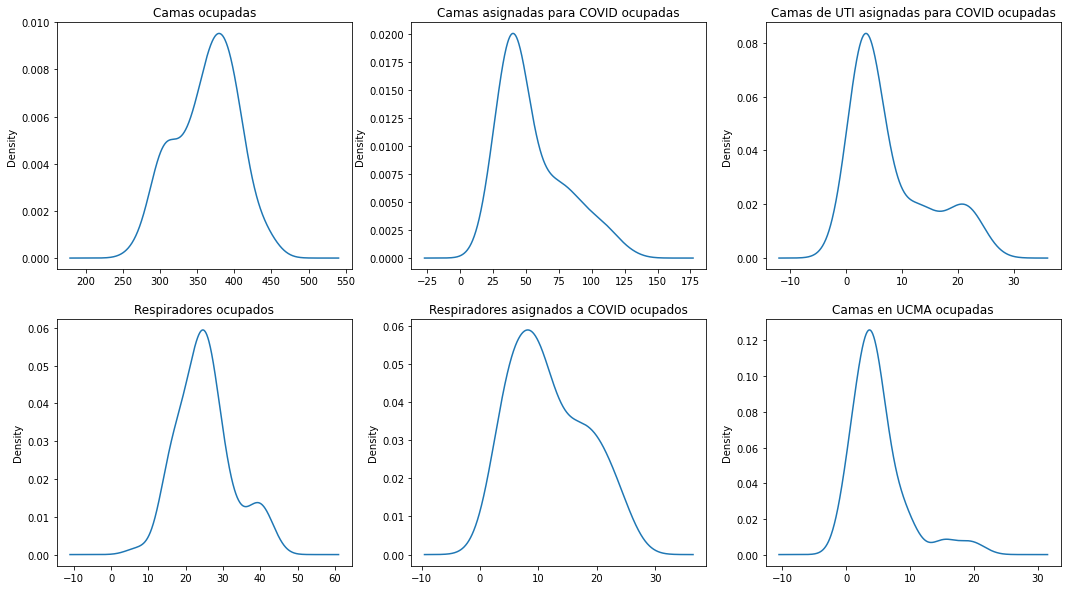

In [50]:
fig,axs = plt.subplots(2,3,figsize=(18,10))
ax=axs[0][0]
df.camas_ocupadas_hospitales.plot.kde(ax=ax,grid=False)
ax.set_title('Camas ocupadas')

ax=axs[0][1]
df.camas_ocupadas_covid_total.plot.kde(ax=ax,grid=False)
ax.set_title('Camas asignadas para COVID ocupadas')

ax=axs[0][2]
df.uti_covid_ocupadas.plot.kde(ax=ax,grid=False)
ax.set_title('Camas de UTI asignadas para COVID ocupadas')

ax=axs[1][0]
df.respiradores_ocupados.plot.kde(ax=ax,grid=False)
ax.set_title('Respiradores ocupados')

ax=axs[1][1]
df.respiradores_covid_ocupados[df.informeNumero>34].plot.kde(ax=ax,grid=False)
ax.set_title('Respiradores asignados a COVID ocupados')

ax=axs[1][2]
df.total_camas_ocupadas_ucma.plot.kde(ax=ax,grid=False)
ax.set_title('Camas en UCMA ocupadas')


Text(0.5, 1.0, 'Camas en UCMA ocupadas')

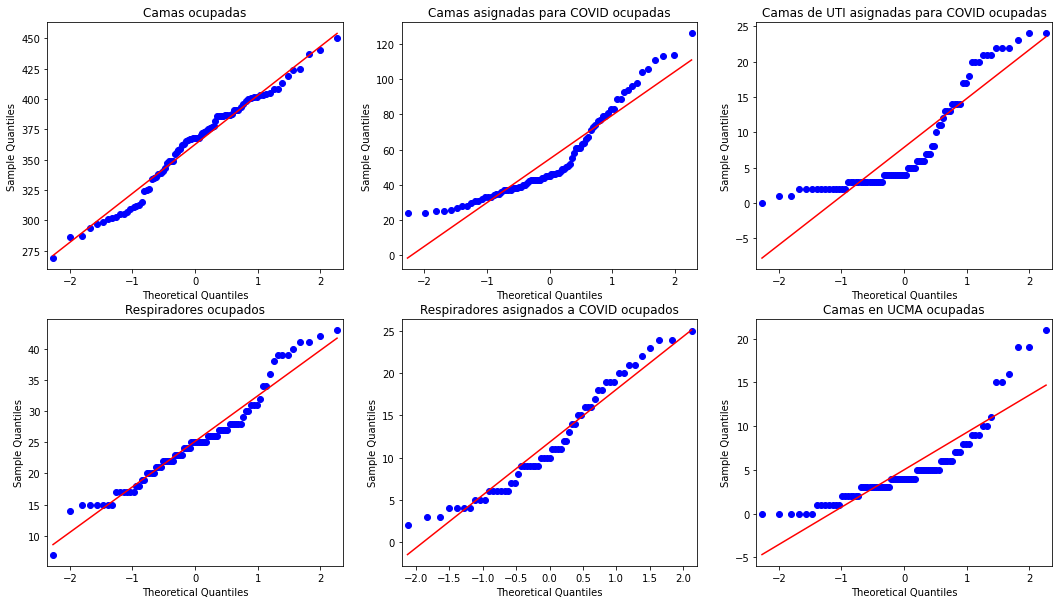

In [51]:
from statsmodels.graphics.gofplots import qqplot
fig,axs = plt.subplots(2,3,figsize=(18,10))
ax=axs[0][0]
qqplot(df.camas_ocupadas_hospitales,ax=ax,line='s')
ax.set_title('Camas ocupadas') 

ax=axs[0][1]
qqplot(df.camas_ocupadas_covid_total,ax=ax,line='s')
ax.set_title('Camas asignadas para COVID ocupadas')

ax=axs[0][2]
qqplot(df.uti_covid_ocupadas,ax=ax,line='s')
ax.set_title('Camas de UTI asignadas para COVID ocupadas')

ax=axs[1][0]
qqplot(df.respiradores_ocupados,ax=ax,line='s')
ax.set_title('Respiradores ocupados')

ax=axs[1][1]
qqplot(df.respiradores_covid_ocupados[df.informeNumero>34],ax=ax,line='s')
ax.set_title('Respiradores asignados a COVID ocupados')

ax=axs[1][2]
qqplot(df.total_camas_ocupadas_ucma,ax=ax,line='s')
ax.set_title('Camas en UCMA ocupadas')

Los gráficos QQ (quantile-quantile) permiten visualizar en qué medida los datos se acercan a una distribución normal. Se calcula la distribución ideal normal asociada a los datos (según su media y varianza), y se calcula un par asociado de cada dato que representa su "versión idealizada" para la misma distribución acumulada. El valor "idealmente normal" del dato se grafica en el eje horizontal y su valor real en el eje vertical. Una distribución normal obtendría una diagonal, que se muestra en rojo como referencia.

Vemos que hay camas_ocupadas y respiradores_ocupados se acercan a una normal, con pequeñas desviaciones en los extremos que pueden atribuirse al tamaño pequeño del dataset. Los respiradores ocupados COVID tambien se acercan bastante a la diagonal.

Por otro lado, las camas ocupadas total de COVID, de UTI covid, y ocupadas UCMA, se desvían de la diagonal, sugiriendo estar lejos de la normalidad.

Esto se condice con lo observado en los histogramas, donde vemos que estas ultimas tres variables tienen un skewness importante

### Tests de normalidad

Hacemos un test de Shapiro-wilk para evaluar la normalidad. Para ello, asumimos la hipótesis nula de que la muestra es normal. Si la rechazamos, concluimos que la muestra no es normal. Definimos un nivel de significancia de 0.05.  

In [57]:
from scipy.stats import shapiro
alpha = 0.05

for col in ['camas_ocupadas_hospitales','camas_ocupadas_covid_total',
             'uti_covid_ocupadas','respiradores_ocupados',
             'respiradores_covid_ocupados','total_camas_ocupadas_ucma']:
  data = df[col]
  if col=='respiradores_covid_ocupados':
    data = df[df.informeNumero>34][col]
  
  stat, p = shapiro(data)
  print(col+': estadístico=%.3f, p=%.3f' % (stat, p))
  if p > alpha:
    print('No se puede rechazar hipótesis nula: no hay evidencia para decir que la muestra no es normal\n')
  else:
    print('Se rechaza la hipótesis nula, concluyendo que la muestra no es normal\n')

camas_ocupadas_hospitales: estadístico=0.975, p=0.099
No se puede rechazar hipótesis nula: no hay evidencia para decir que la muestra no es normal

camas_ocupadas_covid_total: estadístico=0.887, p=0.000
Se rechaza la hipótesis nula, concluyendo que la muestra no es normal

uti_covid_ocupadas: estadístico=0.803, p=0.000
Se rechaza la hipótesis nula, concluyendo que la muestra no es normal

respiradores_ocupados: estadístico=0.958, p=0.007
Se rechaza la hipótesis nula, concluyendo que la muestra no es normal

respiradores_covid_ocupados: estadístico=0.944, p=0.009
Se rechaza la hipótesis nula, concluyendo que la muestra no es normal

total_camas_ocupadas_ucma: estadístico=0.811, p=0.000
Se rechaza la hipótesis nula, concluyendo que la muestra no es normal



Según Shapiro wilk, la única variable que puede considerarse normal en esta muestra es la de camas_ocupadas_hospitales.

Las que le siguen en nivel de significancia fueron respiradores_covid_ocupados y respiradores_ocupados, que se condice con lo que observamos en los QQ plots y los histogramas

### Correlacion

Concluimos con un análisis breve de la correlación entre variables haciendo pair plots de seaborn. Consideramos solo las variables que parecen registrar datos independientes.

Usamos los datos en forma de porcentaje para reducir la cantidad de variables a cruzar, y para usarlas en forma normalizada al rango 0-100

In [76]:
df['porcentaje_ocupacion_uti_covid'] = 100*df.uti_covid_ocupadas/df.uti_covid_totales

In [77]:
df['porcentaje_ocupacion_respiradores_covid'] = 100*df.respiradores_covid_ocupados/df.respiradores_covid_totales

In [78]:
df['porcentaje_ocupacion_respiradores'] = 100*df.respiradores_ocupados/df.respiradores_totales

In [79]:
df['porcentaje_ocupacion_UCMA'] = 100*df.total_camas_ocupadas_ucma/df.total_camas_ucma

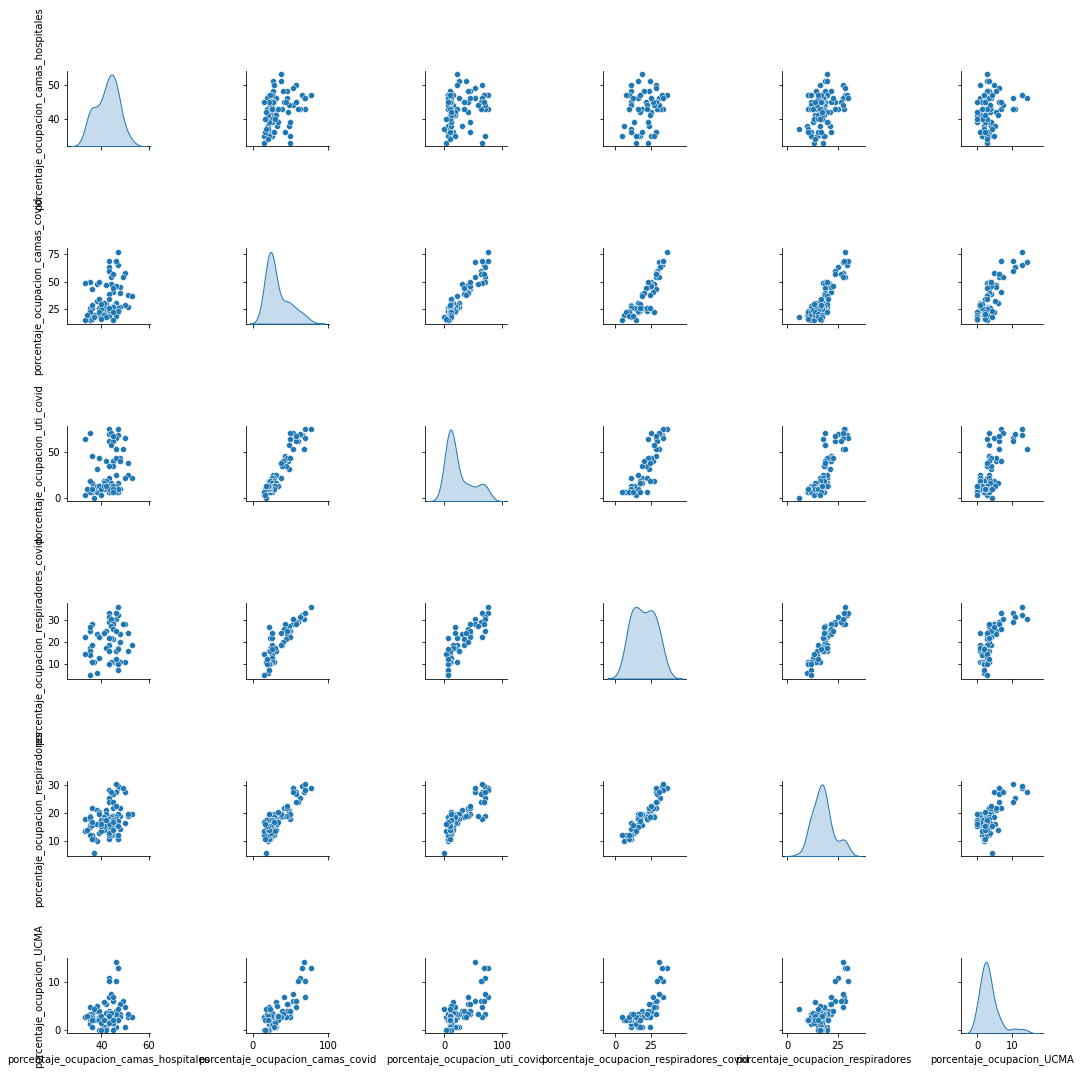

In [81]:
df_numeric_independent =  df[['porcentaje_ocupacion_camas_hospitales',
                              'porcentaje_ocupacion_camas_covid',
                              'porcentaje_ocupacion_uti_covid', 
                              'porcentaje_ocupacion_respiradores_covid',
                              'porcentaje_ocupacion_respiradores',
                              'porcentaje_ocupacion_UCMA']]

sns.pairplot(df_numeric_independent, diag_kind="kde")

Observamos una correlación directamente proporcional en casi todos los pares de variables, que tiene sentido dado que todos son dependientes porque registran el avance del virus en la población. 

La unica variable que parece no tener correlación con las demás es porcentaje_ocupacion_camas_hospitales. Esto sugiere que esta variable depende de otros factores (ej: pacientes internados por causas distintas a covid). La variable camas_ocupadas_hospitales es justamente la que mostró aproximarse a una distribución normal. 

## Ejercicio 2: Clasificación de dataset ficticio

Construimos el dataset requerido

In [4]:
import numpy as np
from matplotlib import pyplot as plt
mu_A = 10
sigma_A = 2

mu_B = 8
sigma_B = 2

A = np.random.normal(mu_A,sigma_A,50)
B = np.random.normal(mu_B,sigma_B,50)

print(A)
print(B)
data = np.concatenate((A,B))
labels = ['A']*50+['B']*50




[10.30347069  6.47961358 10.82235619 12.38281677  6.8280171   7.10292287
  8.57530892  7.92826313  9.10221876  8.38114284 11.48539852 10.18559786
  9.71165166  9.14190011 10.36852911 10.28281965 11.82308556  6.99217799
 12.83159716 10.11306352 11.39592586  8.81550092  8.4163954  10.50443242
  8.31330945  5.85294639 11.54627193 11.7155455  11.48282995  9.25384871
  9.42977072  8.84059958  7.33747808 10.3458378  14.19355792  6.82576397
  8.56737157  9.08609309  8.73590694 10.86531002 12.14687175  8.49651639
 12.47508375  8.88304713  9.92889563  8.86110412 15.20228194 11.10938481
 11.96163537  6.97557427]
[ 6.36140169  6.97084459  5.87535753  8.79104265 11.48092093  6.40759695
 12.46760145  5.77626741  4.81880849  7.86465315  8.80245458  9.12211093
  4.85426785  6.78845636  7.25149829  6.35346495  9.69890436  5.39607651
  9.77991695 10.82122527  5.82682021  3.00715675  7.75999988  7.271412
  7.48821748  8.07263518  4.73885635  6.1671081   6.29870062  9.95728148
  9.18004892  6.30595994  3

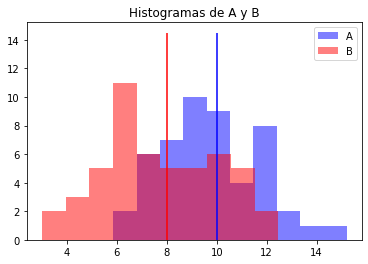

In [5]:
fig,ax = plt.subplots(1,1)
pl = ax.hist(A,color='blue',alpha=0.5,label='A')
pl = ax.hist(B,color='red',alpha=0.5,label='B')
t = ax.set_title('Histogramas de A y B')
ax.vlines(mu_A,0,14.5,color='blue')
ax.vlines(mu_B,0,14.5,color='red')

l = ax.legend()

Ajustamos un clasificador naive bayes para datos continuos (NB gaussiano). Asumimos que entrenamos y testeamos sobre los mismos datos ya que no hubo otra indicación y n=100 es muy poco para splitear 

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
predictions = gnb.fit(data.reshape(-1, 1), labels).predict_proba(data.reshape(-1, 1))
predictions_binary = gnb.fit(data.reshape(-1, 1), labels).predict(data.reshape(-1, 1))

In [7]:
gnb.classes_

array(['A', 'B'], dtype='<U1')

In [8]:
predictions[0,]

array([0.67315323, 0.32684677])

In [9]:
predictions_binary[0,]

'A'

AUC:  0.7468


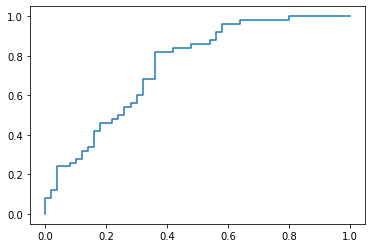

In [11]:
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, roc_auc_score

fpr,tpr,th = roc_curve(labels,predictions[:,0],pos_label='A')
print('AUC: ',roc_auc_score([1 if l=='A' else 0 for l in labels],predictions[:,0]))

plt.plot(fpr,tpr)

In [13]:
result = classification_report(labels,predictions_binary)

In [14]:
print(result)

              precision    recall  f1-score   support

           A       0.67      0.72      0.69        50
           B       0.70      0.64      0.67        50

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



Al ser dos clases nos muestra metricas considerando cada una como positiva

In [34]:
for fpr_,tpr_,th_ in zip(fpr,tpr,th):
  print(fpr_,tpr_,th_)

0.0 0.0 1.8748111752457735
0.0 0.02 0.8748111752457735
0.0 0.08 0.8042808829048138
0.02 0.08 0.803970255574906
0.02 0.12 0.7898643095625822
0.04 0.12 0.7891900258912411
0.04 0.24 0.7553064636443156
0.08 0.24 0.7514738601245982
0.08 0.26 0.7502024609961574
0.1 0.26 0.7328805627722115
0.1 0.28 0.7323486535862003
0.12 0.28 0.7243460094260802
0.12 0.32 0.7128250492410947
0.14 0.32 0.7127447810576808
0.14 0.34 0.6892006245891693
0.16 0.34 0.6792840393281426
0.16 0.42 0.6714547008785681
0.18 0.42 0.6666964594191592
0.18 0.46 0.6571416389168707
0.22 0.46 0.64345664391793
0.22 0.48 0.6409064972361164
0.24 0.48 0.6272386666558656
0.24 0.5 0.6208176900605595
0.26 0.5 0.6196077772335498
0.26 0.54 0.5752767967531168
0.28 0.54 0.5675494234044381
0.28 0.56 0.5635153296821594
0.3 0.56 0.5614122339250832
0.3 0.6 0.5575663292020554
0.32 0.6 0.5462837149690266
0.32 0.68 0.5279626758550284
0.36 0.68 0.5252286376174585
0.36 0.82 0.47021975322824877
0.42 0.82 0.4352111688244765
0.42 0.84 0.4242964369522209

Vemos que a medida que disminuye el umbral, aumenta el FPR (empeora la especificidad) y mejora la sensibilidad. 

Esto sugiere que la columna 0 de las predicciones del modelo, que estamos usando como score, puede interpretarse como inversamente proporcional a la probabilidad a posteriori de que la observación sea de clase A

Construimos funcion para calcular las metricas segun un umbral

In [48]:
def getMetrics(umbral,scores,labels,print_results=True):
  score_binario = ['A' if score>umbral else 'B' for score in scores]
  tn, fp, fn, tp = confusion_matrix(labels,score_binario).ravel()
  
  sens = tp/(tp+fn)
  spec = tn/(tn+fp)
  ppv = tp/(tp+fp)
  npv = tn/(tn+fn)
  if print_results:
    print(f'True negatives:{tn}\nTrue positives:{tp}\nFalse negatives:{fn}\nFalse positives:{fp}')
    print(f'\nSensitivity(recall):{sens:.2f}\nSpecificity:{spec:.2f}')
    print(f'PPV(precision):{ppv:.2f}\nNPV:{npv:.2f}\n')

    print('f1-score:{:.3f}'.format(2*ppv*sens/(ppv+sens)))
    print('accuracy:{:.3f}'.format((tp+tn)/(tn+fp+fn+tp)))
  else:
    return tn, fp, fn, tp

In [49]:
getMetrics(0.5,predictions[:,0],labels)

True negatives:36
True positives:32
False negatives:18
False positives:14

Sensitivity(recall):0.64
Specificity:0.72
PPV(precision):0.70
NPV:0.67

f1-score:0.667
accuracy:0.680


In [50]:
getMetrics(0.1,predictions[:,0],labels)

True negatives:50
True positives:2
False negatives:48
False positives:0

Sensitivity(recall):0.04
Specificity:1.00
PPV(precision):1.00
NPV:0.51

f1-score:0.077
accuracy:0.520


In [51]:
getMetrics(0.8,predictions[:,0],labels)

True negatives:5
True positives:49
False negatives:1
False positives:45

Sensitivity(recall):0.98
Specificity:0.10
PPV(precision):0.52
NPV:0.83

f1-score:0.681
accuracy:0.540


Vemos como disminuir el umbral hace que más casos sean clasificados como negativos (B). En este caso, con un umbral de 0.1 el modelo clasifica solo 2 casos como positivos (A), lo que da un valor de especificidad y precision perfecetos, a costa de una sensibilidad casi nula. 

Al aumentar el umbral a 0.8, nos pasamos al otro extremo de la curva ROC, con una alta sensibilidad casi 100%, y una baja especificidad. Sin embargo el f1 score es más alto, indicando que este umbral sería "globalmente" mejor. 

Para hallar el umbral óptimo vamos a comparar dos criterios: 
- maximizar el f1-score
- maixmizar youden index (sens+spec-1)

In [54]:
f1scores = []
youdenIndexes = []
for th_ in th:

  tn, fp, fn, tp = getMetrics(th_,predictions[:,0],labels,print_results=False)
  recall = tp/(tp+fn)
  spec = tn/(tn+fp)
  precision = tp/(tp+fp)
  f1scores.append(2*recall*precision/(recall+precision))
  youdenIndexes.append(recall+spec-1)

print('Max F1-score: {:.3f}. Threshold: {:.3f}. Spec: {:.3f}. Sens: {:.3f}'.format(np.max(f1scores),
                                        th[np.argmax(f1scores)],1-fpr[np.argmax(f1scores)],tpr[np.argmax(f1scores)]))
print('Max Youden Index: {:.3f}. Threshold: {:.3f}. Spec: {:.3f}. Sens: {:.3f}'.format(np.max(youdenIndexes),
    th[np.argmax(youdenIndexes)],1-fpr[np.argmax(youdenIndexes)],tpr[np.argmax(youdenIndexes)]))


Max F1-score: 0.701. Threshold: 0.755. Spec: 0.960. Sens: 0.240
Max Youden Index: 0.440. Threshold: 0.470. Spec: 0.640. Sens: 0.820


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


Segun el youden index deberiamos seleccionar un umbral de 0.47, pero para maximizar f1-score debemos seleccionar un umbral de 0.75. Esto dependera del costo de cada tipo de error y de la prevalencia de cada clase. El f1-score "prioriza" disminuir los falsos positivos por sobre la sensibilidad; es decir, prefiere falsos negativos (positivos no detectados y por ende menos sensible) a costa de no tener tantos falsos positivos.

En este caso donde las clases son balanceadas, podría ser más sensato seleccionar el máximo de Youden Index. Si en cambio la población tuviese una prevalencia de positivos significativamente menor que los negativos, sería más sensato referirse al f1-score como métrica principal.


### Variar distribuciones y umbrales

Para facilitar las simulaciones organizamos todo en una funcion

In [62]:
def getMetricsFromData(mu_A,sigma_A,mu_B,sigma_B,umbral=0.5,n=50):
  A = np.random.normal(mu_A,sigma_A,n)
  B = np.random.normal(mu_B,sigma_B,n)
  data = np.concatenate((A,B))
  labels = ['A']*50+['B']*50

  gnb = GaussianNB()
  predictions = gnb.fit(data.reshape(-1, 1), labels).predict_proba(data.reshape(-1, 1))
  predictions_binary = gnb.fit(data.reshape(-1, 1), labels).predict(data.reshape(-1, 1))
  fpr,tpr,th = roc_curve(labels,predictions[:,0],pos_label='A')
  print('AUC: ',roc_auc_score([1 if l=='A' else 0 for l in labels],predictions[:,0]))
  plt.plot(fpr,tpr)
  getMetrics(umbral,predictions[:,0],labels)

**Caso extremo:** mismo desvío, doble de media, más de 7 desvios de diferencia entre ambas medias

AUC:  1.0
True negatives:50
True positives:50
False negatives:0
False positives:0

Sensitivity(recall):1.00
Specificity:1.00
PPV(precision):1.00
NPV:1.00

f1-score:1.000
accuracy:1.000


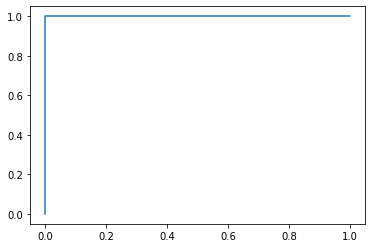

In [63]:
getMetricsFromData(mu_A=150,sigma_A=20,
                   mu_B=300,sigma_B=20,
                   umbral=0.5,n=50)

**Caso 2:** acercamos las medias a tres desvios de distancia, seguimos con el mismo desvio en ambas

AUC:  0.9904000000000001
True negatives:48
True positives:48
False negatives:2
False positives:2

Sensitivity(recall):0.96
Specificity:0.96
PPV(precision):0.96
NPV:0.96

f1-score:0.960
accuracy:0.960


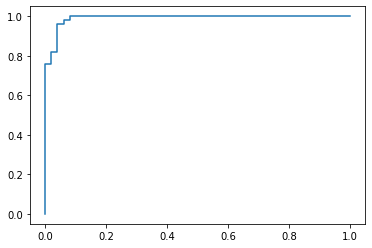

In [64]:
getMetricsFromData(mu_A=150,sigma_A=20,
                   mu_B=210,sigma_B=20,
                   umbral=0.5,n=50)

Observamos que la clasificacion empeora levemente pero sigue siendo muy buena

**Caso 3:** un desvio de distancia entre medias 

AUC:  0.6823999999999999
True negatives:28
True positives:35
False negatives:15
False positives:22

Sensitivity(recall):0.70
Specificity:0.56
PPV(precision):0.61
NPV:0.65

f1-score:0.654
accuracy:0.630


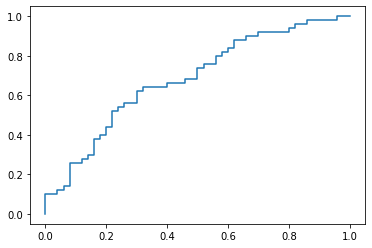

In [65]:
getMetricsFromData(mu_A=150,sigma_A=20,
                   mu_B=170,sigma_B=20,
                   umbral=0.5,n=50)

La clasificación empeoró notablemente

**Caso 4:** misma media y desvios bien distintos

AUC:  0.9516
True negatives:49
True positives:42
False negatives:8
False positives:1

Sensitivity(recall):0.84
Specificity:0.98
PPV(precision):0.98
NPV:0.86

f1-score:0.903
accuracy:0.910


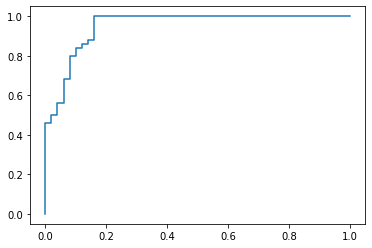

In [66]:
getMetricsFromData(mu_A=150,sigma_A=10,
                   mu_B=150,sigma_B=100,
                   umbral=0.5,n=50)

La clasificación es mejor que en el caso 3, especialmente en cuanto a especificidad y f1 score


### Cambios de umbral
**Caso 5:** tomamos el caso 4 y probamos variar el umbral

AUC:  0.9604
True negatives:50
True positives:43
False negatives:7
False positives:0

Sensitivity(recall):0.86
Specificity:1.00
PPV(precision):1.00
NPV:0.88

f1-score:0.925
accuracy:0.930


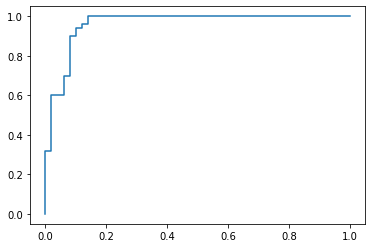

In [67]:
getMetricsFromData(mu_A=150,sigma_A=10,
                   mu_B=150,sigma_B=100,
                   umbral=0.1,n=50)

Un umbral de 0.1 nos da un muy f1-score y muy buen accuracy

### Automatizar la elección del umbral

Diseñamos una funcion que a partir de datos y sus etiquetas encuentre el mejor umbral

In [69]:
def metricsWithBestThreshold(data,labels,threshold_criteria='f1-score'):
  gnb = GaussianNB()
  predictions = gnb.fit(data.reshape(-1, 1), labels).predict_proba(data.reshape(-1, 1))
  predictions_binary = gnb.fit(data.reshape(-1, 1), labels).predict(data.reshape(-1, 1))
  fpr,tpr,th = roc_curve(labels,predictions[:,0],pos_label='A')
  print('AUC: ',roc_auc_score([1 if l=='A' else 0 for l in labels],predictions[:,0]))
  plt.plot(fpr,tpr)
  
  f1scores = []
  youdenIndexes = []
  for th_ in th:

    tn, fp, fn, tp = getMetrics(th_,predictions[:,0],labels,print_results=False)
    recall = tp/(tp+fn)
    spec = tn/(tn+fp)
    precision = tp/(tp+fp)
    f1scores.append(2*recall*precision/(recall+precision))
    youdenIndexes.append(recall+spec-1)
  if threshold_criteria=='f1-score':
    print('Max F1-score: {:.3f}. Threshold: {:.3f}. Spec: {:.3f}. Sens: {:.3f}'.format(np.max(f1scores),
                                          th[np.argmax(f1scores)],1-fpr[np.argmax(f1scores)],tpr[np.argmax(f1scores)]))
    best_th = th[np.argmax(f1scores)]
    getMetrics(best_th,predictions[:,0],labels)
  if threshold_criteria=='youden-index':
    print('Max Youden Index: {:.3f}. Threshold: {:.3f}. Spec: {:.3f}. Sens: {:.3f}'.format(np.max(youdenIndexes),
      th[np.argmax(youdenIndexes)],1-fpr[np.argmax(youdenIndexes)],tpr[np.argmax(youdenIndexes)]))
    best_th = th[np.argmax(youdenIndexes)]
    getMetrics(best_th,predictions[:,0],labels)  
  

AUC:  0.7468
Max F1-score: 0.701. Threshold: 0.755. Spec: 0.960. Sens: 0.240
True negatives:11
True positives:48
False negatives:2
False positives:39

Sensitivity(recall):0.96
Specificity:0.22
PPV(precision):0.55
NPV:0.85

f1-score:0.701
accuracy:0.590


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


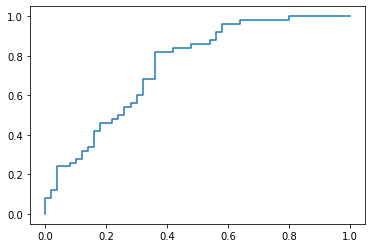

In [70]:
metricsWithBestThreshold(data,labels,threshold_criteria='f1-score')

AUC:  0.7468
Max Youden Index: 0.440. Threshold: 0.470. Spec: 0.640. Sens: 0.820
True negatives:40
True positives:32
False negatives:18
False positives:10

Sensitivity(recall):0.64
Specificity:0.80
PPV(precision):0.76
NPV:0.69

f1-score:0.696
accuracy:0.720


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


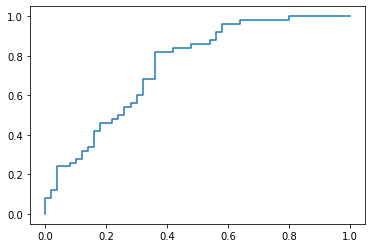

In [71]:
metricsWithBestThreshold(data,labels,threshold_criteria='youden-index')